<a href="https://colab.research.google.com/github/Davidospina1000/Data-Integration/blob/main/2_1_POO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programación Orientada por Objetos

0. Se procede con la carga de las librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
nxl = '/content/drive/MyDrive/BUSINESS INTELLIGENCE/Integración de datos y prospectiva/2. FallasTecnológicas.xlsx'
XDB = pd.read_excel(nxl, sheet_name=0)
XDB.head()

,Fechas,Transacciones Diarias,Valor Transado (millones),Transacciones Fallidas,Valor Generado Promedio (millones)
0,2009-01-01,80.0,14.8058,1.0,0.5374
1,2009-01-02,105.0,56.4721,4.0,1.1978
2,2009-01-03,70.0,9.976,5.0,0.4269
3,2009-01-04,105.0,18.2949,6.0,1.0814
4,2009-01-05,130.0,23.4112,7.0,1.2105


In [ ]:
Xf=XDB.iloc[:,3]
Xs=XDB.iloc[:,4]
LDA=np.multiply(Xf,Xs)
dfLDA=pd.DataFrame(LDA)
dfLDA.head()

,0
0,0.5374
1,4.7912
2,2.1345
3,6.4884
4,8.4735


2. Se procede con el muestreo de la variable aleatoria

La media de los datos es: 10.949406999999997


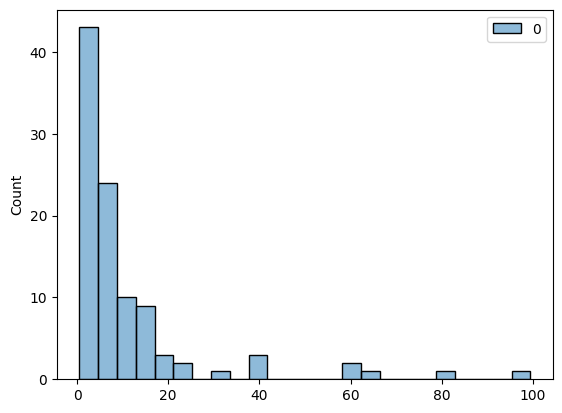

In [ ]:
#Se hace el muestreo a 100 (99%)
LDA100=dfLDA.sample(n=100, replace=False)
media100=np.mean(LDA100)
print("La media de los datos es:", media100)
plt.figure()
sns.histplot(LDA100)
plt.show()


3. Se crea la función muestreo



In [ ]:
def muestreo(ND, dfLDA, p):
  #ND: Número de datos de muestreo
  #dfLDA: Son los datos enviados al método
  #Método: Forma de hacer las cosas
  LDAm=dfLDA.sample(n=ND, replace=True)
  media=np.mean(LDAm)
  LI = media + 1.96*np.std(LDAm)
  LS = media - 1.96*np.std(LDAm)
  cas=skew(LDAm)
  kur=kurtosis(LDAm)
  ek2=((1.96**2)*p*(1-p)/ND)
  plt.figure()
  sns.histplot(LDAm, kde=True)
  plt.show()

  return media, LDAm, LI, LS, cas, kur, ek2 #Que quiero que me arroje: variable de salida
                     #Este método me entrega la media y los datos muestreados


In [ ]:
def tipodist(cas,ck):
  if abs(cas)<0.5 and abs(ck)<0.5:
      tpdst="Posible distribución Normal"

  elif cas>0 and ck>3:
    if ck>=8:
      tpdst="Posible distribución Exponencial"
    elif ck>=6:
      tpdst="Posible distribución Gamma"
    else:
      tpdst="Posible distribución Weibull"

  elif cas<0 and ck<3:
    tpdst="Posible distribución Beta"
  elif ck<3:
    tpdst="Posible distribución Uniforme"
  else:
    tpdst="No se pudo identificar la distribución"

  return tpdst

4. Procedemos con el muestreo

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


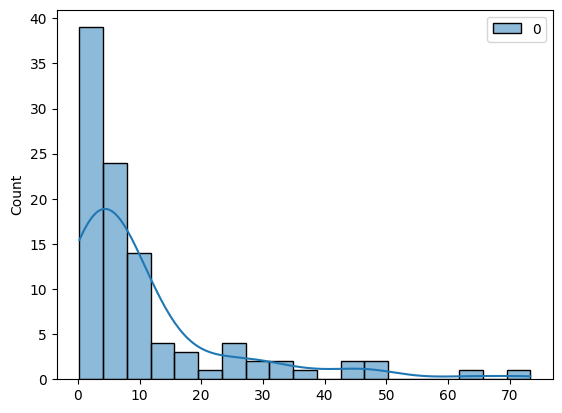

La media de los datos es: 10.454504
Los datos muestreados son:
            0
232   5.2503
471  12.3704
267  29.2744
627  47.3832
623  34.3542
..       ...
269   0.3695
161   0.3151
194   2.8933
456   1.1836
196  10.9632

[100 rows x 1 columns]
El intervalo superior es: 0    37.361369
dtype: float64
El intervalo inferior es: 0   -16.452361
dtype: float64
La asimetría es: [2.38182664]
La curtosis es: [5.91395608]
La distribución es: Posible distribución Weibull


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


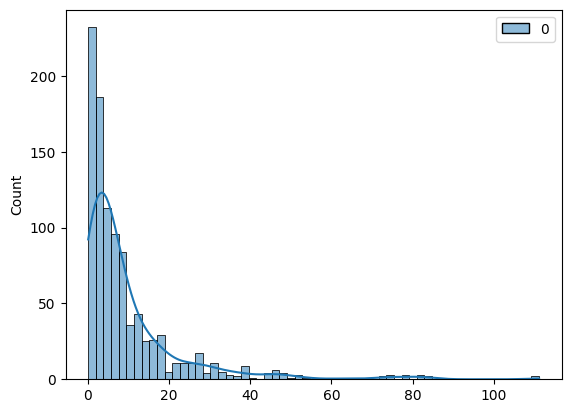

La media de los datos es: 9.798918655967903
Los datos muestreados son:
            0
158   9.4396
49    1.4688
545   5.0116
484   7.7085
101   0.6198
..       ...
466  17.0050
416  17.3129
78    6.3610
584   3.5575
286   4.9445

[1000 rows x 1 columns]


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


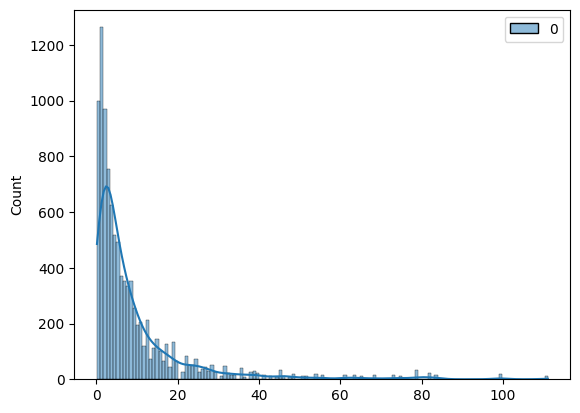

La media de los datos es: 9.290189033550327
Los datos muestreados son:
            0
335   0.2526
418   0.7704
350   5.9100
630   7.5570
558   6.2064
..       ...
312   2.8240
16   29.4570
257   3.2695
213   7.7950
414   5.2875

[10000 rows x 1 columns]


In [ ]:
#Muestreo a una confiabilidad del 99%
media99, LDAm99, LI99, LS99, cas99, kur99, ek2999  = muestreo(100,dfLDA, 0.99)
print("La media de los datos es:", media99)
print("Los datos muestreados son:\n", LDAm99)
print("El intervalo superior es:", LI99)
print("El intervalo inferior es:", LS99)
print("La asimetría es:", cas99)
print("La curtosis es:", kur99)
print("La distribución es:", tipodist(cas99,kur99))
print("El error estimado es:", ek2999)

#Muestreo a una confiabilidad del 99,9%
media999, LDAm999, LI999, LS999, cas999, kur999, ek2999 = muestreo(1000,dfLDA, 0.999)
print("La media de los datos es:", media999)
print("Los datos muestreados son:\n", LDAm999)

#Muestreo a una confiabilidad del 99,99%
media9999, LDAm9999, LI9999, LS9999, cas9999, kur9999, ek29999 = muestreo(10000,dfLDA, 0.9999)
print("La media de los datos es:", media9999)
print("Los datos muestreados son:\n", LDAm9999)